In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('../raw_data/hospital_readmissions.csv')

# General prerequisites

In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [5]:
data = data[data['diag_1'] != 'Missing']
data = data[data['diag_2'] != 'Missing']


# Scaling

## 'time_in_hospital'

In [6]:
min_max_scaler = MinMaxScaler()
data['time_in_hospital_scaled'] = min_max_scaler.fit_transform(data[['time_in_hospital']])

In [7]:
min_max_scaler = MinMaxScaler()
data['n_procedures_scaled'] = min_max_scaler.fit_transform(data[['n_procedures']])

# Encoding/Scaling

## 'n_lab_procedures', 'n_medications'

In [8]:
min_max_scaler = MinMaxScaler()
data['n_lab_procedures_grouped'] = (data['n_lab_procedures'] // 10).astype(int)
data['n_lab_procedures_scaled'] = min_max_scaler.fit_transform(data[['n_lab_procedures_grouped']])

In [9]:
min_max_scaler = MinMaxScaler()
data['n_medications_grouped'] = (data['n_medications'] // 5).astype(int)
data['n_medications_scaled'] = min_max_scaler.fit_transform(data[['n_medications_grouped']])

## 'n_outpatient', 'n_inpatient'

In [10]:
min_max_scaler = MinMaxScaler()
data['n_outpatient'] = data['n_outpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
data['n_outpatient_scaled'] = min_max_scaler.fit_transform(data[['n_outpatient']])

In [11]:
min_max_scaler = MinMaxScaler()
data['n_inpatient'] = data['n_inpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
data['n_inpatient_scaled'] = min_max_scaler.fit_transform(data[['n_inpatient']])

In [12]:
min_max_scaler = MinMaxScaler()
data['n_emergency'] = data['n_emergency'].map({0: 0, 1: 1}).fillna(2).astype(int)
data['n_emergency_scaled'] = min_max_scaler.fit_transform(data[['n_emergency']])

# Encoding

## 'diabetes_med', 'change', 'age','readmitted'

In [13]:
# Drop 'Missing' data in Diagnosis - all below 1%
data = data[data['diag_1'] != 'Missing']
data = data[data['diag_2'] != 'Missing']
data = data[data['diag_3'] != 'Missing']

In [14]:
ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary")
columns_to_encode = ['diabetes_med', 'change', 'age','readmitted', 'diag_1', 'diag_2', 'diag_3', 'A1Ctest']

for column in columns_to_encode:
    ohe_binary.fit(data[[column]])
    data[ohe_binary.get_feature_names_out([column])] = ohe_binary.transform(data[[column]])
    data = data.drop(columns=[column])

# Drop columns

In [15]:
data = data.drop(columns=['time_in_hospital','n_lab_procedures', 'n_lab_procedures_grouped', 'medical_specialty'
                          , 'glucose_test','n_outpatient','n_inpatient','n_medications_grouped'
                          , 'n_emergency', 'n_medications', 'n_procedures'])

# Final Data

In [16]:
data.columns

Index(['time_in_hospital_scaled', 'n_procedures_scaled',
       'n_lab_procedures_scaled', 'n_medications_scaled',
       'n_outpatient_scaled', 'n_inpatient_scaled', 'n_emergency_scaled',
       'diabetes_med_yes', 'change_yes', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)',
       'readmitted_yes', 'diag_1_Circulatory', 'diag_1_Diabetes',
       'diag_1_Digestive', 'diag_1_Injury', 'diag_1_Musculoskeletal',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Circulatory',
       'diag_2_Diabetes', 'diag_2_Digestive', 'diag_2_Injury',
       'diag_2_Musculoskeletal', 'diag_2_Other', 'diag_2_Respiratory',
       'diag_3_Circulatory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Injury', 'diag_3_Musculoskeletal', 'diag_3_Other',
       'diag_3_Respiratory', 'A1Ctest_high', 'A1Ctest_no', 'A1Ctest_normal'],
      dtype='object')

In [17]:
data.head()

,time_in_hospital_scaled,n_procedures_scaled,n_lab_procedures_scaled,n_medications_scaled,n_outpatient_scaled,n_inpatient_scaled,n_emergency_scaled,diabetes_med_yes,change_yes,age_[40-50),...,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,0.538462,0.166667,0.636364,0.200000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.153846,0.333333,0.272727,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.307692,0.000000,0.363636,0.200000,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.076923,0.000000,0.272727,0.133333,0.5,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.363636,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
data.describe()

,time_in_hospital_scaled,n_procedures_scaled,n_lab_procedures_scaled,n_medications_scaled,n_outpatient_scaled,n_inpatient_scaled,n_emergency_scaled,diabetes_med_yes,change_yes,age_[40-50),...,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,A1Ctest_high,A1Ctest_no,A1Ctest_normal
count,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,...,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000,24779.000000
mean,0.266566,0.226085,0.353635,0.190707,0.124682,0.241132,0.072622,0.769482,0.460430,0.100165,...,0.310021,0.171557,0.036967,0.018726,0.018322,0.367206,0.077202,0.112959,0.837524,0.049518
std,0.231133,0.286341,0.180078,0.109047,0.297163,0.365452,0.221035,0.421173,0.498442,0.300227,...,0.462511,0.377002,0.188684,0.135557,0.134116,0.482053,0.266918,0.316549,0.368895,0.216951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.000000,0.272727,0.133333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.230769,0.166667,0.363636,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.384615,0.333333,0.454545,0.266667,0.000000,0.500000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


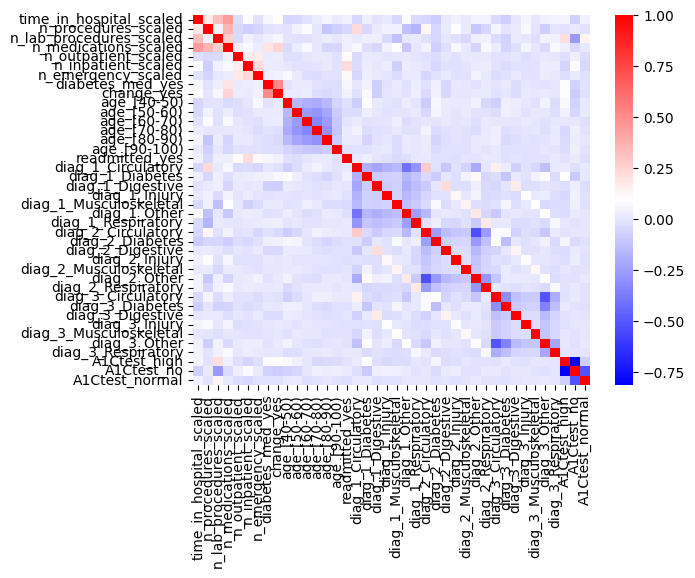

In [20]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [21]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showe the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
1557,A1Ctest_no,A1Ctest_high,-0.810198,0.810198
1518,A1Ctest_high,A1Ctest_no,-0.810198,0.810198
1143,diag_2_Other,diag_2_Circulatory,-0.528803,0.528803
948,diag_2_Circulatory,diag_2_Other,-0.528803,0.528803
1598,A1Ctest_normal,A1Ctest_no,-0.518217,0.518217
1559,A1Ctest_no,A1Ctest_normal,-0.518217,0.518217
1235,diag_3_Circulatory,diag_3_Other,-0.510624,0.510624
1430,diag_3_Other,diag_3_Circulatory,-0.510624,0.510624
288,diabetes_med_yes,change_yes,0.505605,0.505605
327,change_yes,diabetes_med_yes,0.505605,0.505605
